## Abalone

In [168]:
# Data frames.
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [169]:
# Reading and saving data from abalone.csv as a pandas database
abaloneData = pd.read_csv("data/abalone.csv")

# Checking shape
abaloneShape = abaloneData.shape
print("abaloneData has {} rows and {} columns".format(abaloneShape[0], abaloneShape[1]))

# A look at the data
abaloneData.head()

abaloneData has 4177 rows and 9 columns


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [170]:
# Checking data types
abaloneData.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

### Attribute information

Attribute information taken from data source. Ref: https://archive.ics.uci.edu/dataset/1/abalone



| Name           | Data Type | Meas.      | Description                       |
| -------------- | ----------| ---------- | --------------------------------- |
| Sex            | nominal   | M, F, and I| (infant)                          |
| Length         | continuous| mm         | Longest shell measurement         |
| Diameter       | continuous| mm         | perpendicular to length           |
| Height         | continuous| mm         | with meat in shell                |
| Whole weight   | continuous| grams      | whole abalone                     |
| Shucked weight | continuous| grams      | weight of meat                    |
| Viscera weight | continuous| grams      | gut weight (after bleeding)       |
| Shell weight   | continuous| grams      | after being dried                 |
| Rings          | integer   |            | +1.5 gives the age in years       |

In [171]:
# Putting this attribute information into a callable database

attributeInformation = {
    "Name": [
        "Sex", "Length", "Diameter", "Height", "Whole weight", 
        "Shucked weight", "Viscera weight", "Shell weight", "Rings"
    ],
    "Data Type": [
        "nominal", "continuous", "continuous", "continuous", "continuous", 
        "continuous", "continuous", "continuous", "integer"
    ],
    "Meas.": [
        ["M", "F", "I"], "mm", "mm", "mm", "grams", 
        "grams", "grams", "grams", "total count"
    ],
    "Description": [
        "(infant)", "Longest shell measurement", "perpendicular to length", 
        "with meat in shell", "whole abalone", "weight of meat", 
        "gut weight (after bleeding)", "after being dried", "+1.5 gives the age in years"
    ]
}

In [172]:
# Cleaning Data of NaN values
abaloneData.dropna()

# Getting change in data shape
deltaRows = int(abaloneShape[0])-int(abaloneData.shape[0])
deltaColumns = int(abaloneShape[1])-int(abaloneData.shape[1])

# Checking shape post cleaning
print("abaloneData has lost {} rows and {} columns".format((deltaRows),
        (deltaColumns)))

abaloneData has lost 0 rows and 0 columns


The data has not lost any rows or columns, meaning all cells are populated with data

### Plotting data

In [212]:
# Creating a function for plotting histagrams of the data
def plotHist(data):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting the units of the variables
    unit = attributeInformation['Meas.']
    # Making the plot large, as there is good quality given the large sample size
    plt.figure(figsize=(15, 15))

    for i in range(1, 9):
        plt.subplot(3, 3, i)

        plt.hist(data[str(abaloneCols[i])], bins= 30, label=[str(data.columns[int(i)])])
    
        # Adding a title and label and gridlines as part of the function
        plt.title(str(abaloneCols[i]), size = 15, color = 'black')
        
        plt.xlabel(str(unit[i]), size = 12, color = 'black')
        plt.grid()

    # outputting the histograms to a saved .png and also printing a copy to user
    plt.tight_layout()
    
    # File path is given as relative to the analysis.py program
    #plt.savefig('Outputs\Histograms\{}.png'.format(col))
    plt.show()

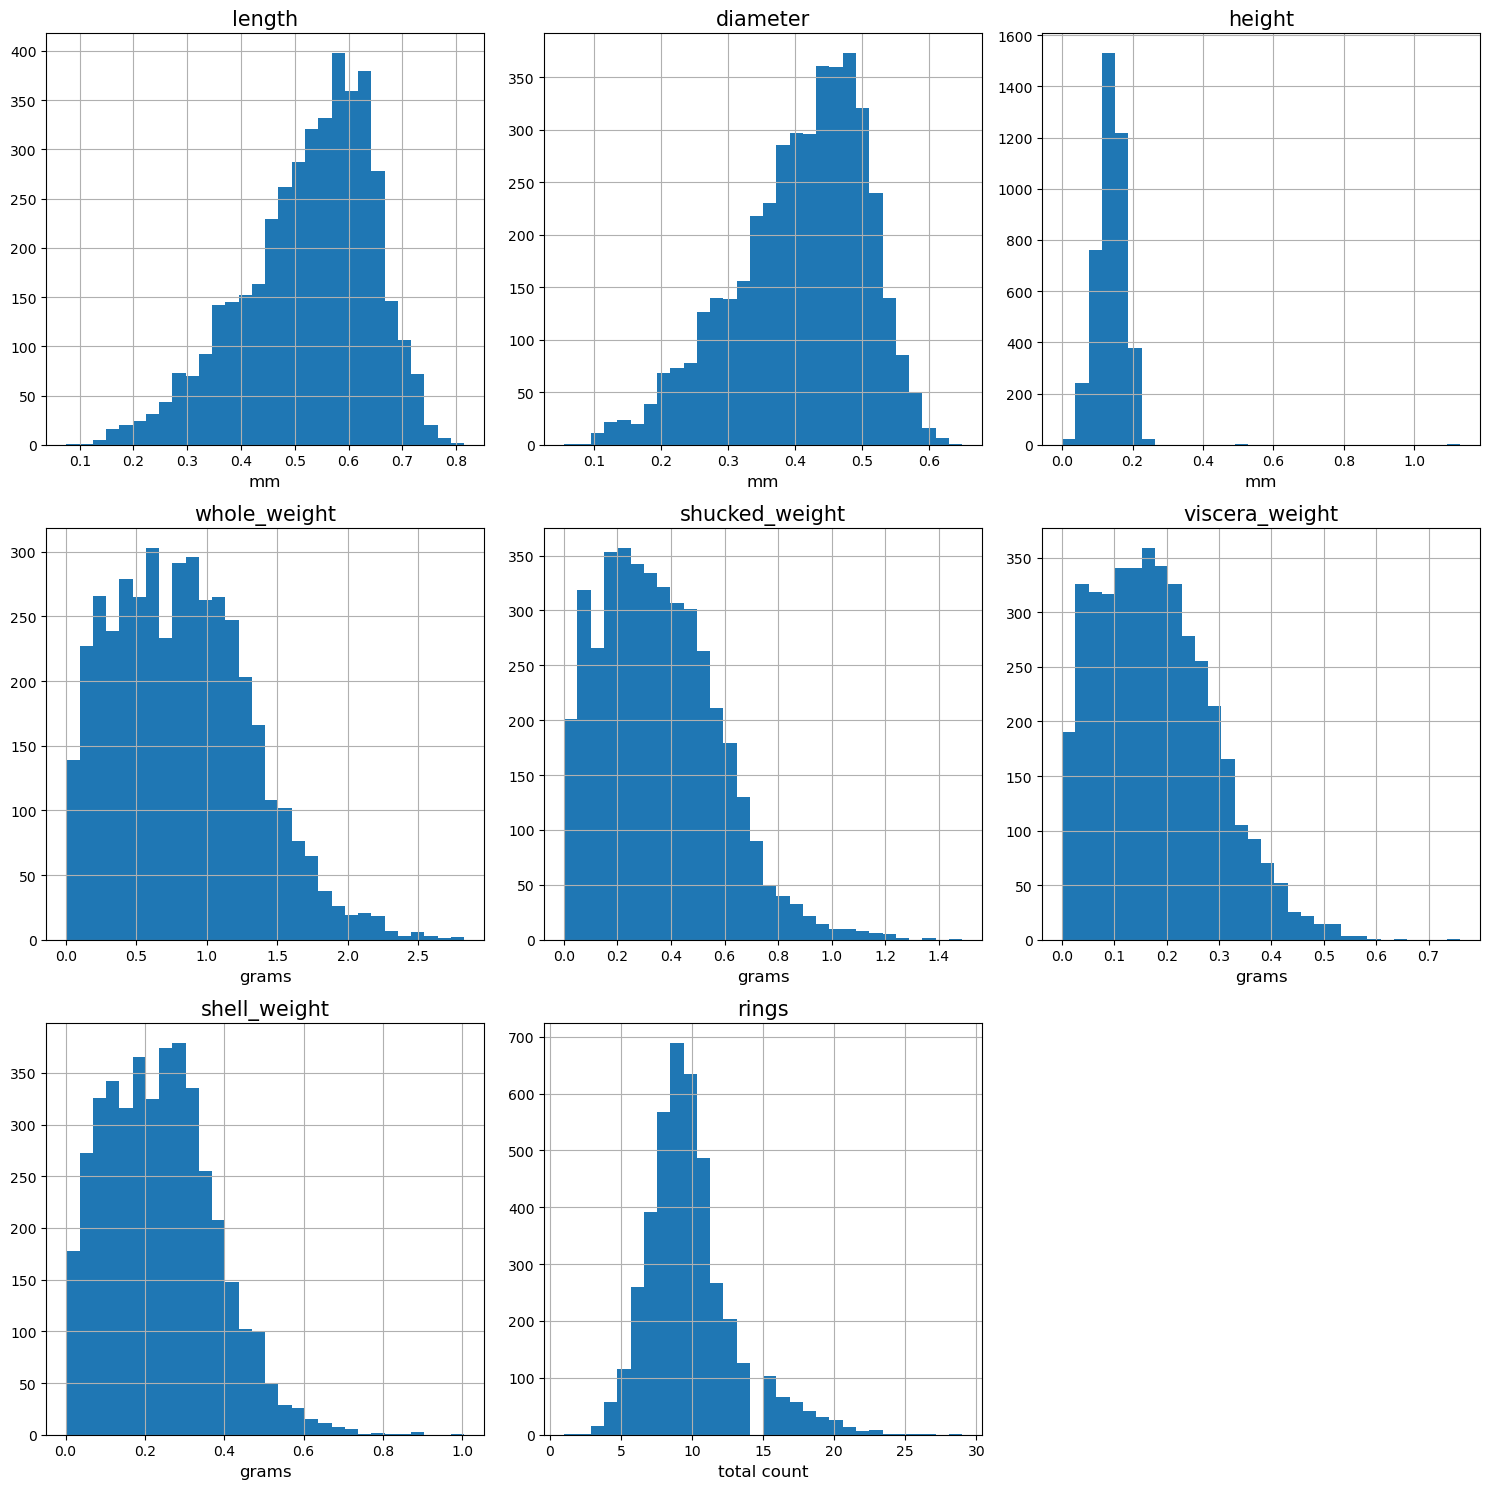

In [213]:
plotHist(abaloneData)

In [221]:
def plotSexColour(data):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting the units of the variables
    unit = attributeInformation['Meas.']
    sex = unit[0]

    # Making the plot large, as there is good quality given the large sample size
    plt.figure(figsize=(15, 15))

    # Set the color map to match the number of species
    z = range(1,len(sex))
    hot = plt.get_cmap('hot')
    cNorm  = colors.Normalize(vmin=0, vmax=len(sex))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        x=data[str(abaloneCols[i])]
        y=data['rings']+1.5

    

        # Plot each species
        for j in range(len(sex)):
            indx = data['sex'] == sex[j]
            plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(j), label=sex[j], alpha=.1)

    
    
        # Adding a title and label and gridlines as part of the function
        plt.title(str(abaloneCols[i]), size = 15, color = 'black')

        plt.xlabel(str(unit[i]), size = 12, color = 'black')
        plt.ylabel('Age')
        plt.legend(loc='upper left')

    # outputting the histograms to a saved .png and also printing a copy to user
    plt.tight_layout()

    #plt.savefig('Outputs\Histograms\{}.png'.format(col))
    plt.show()

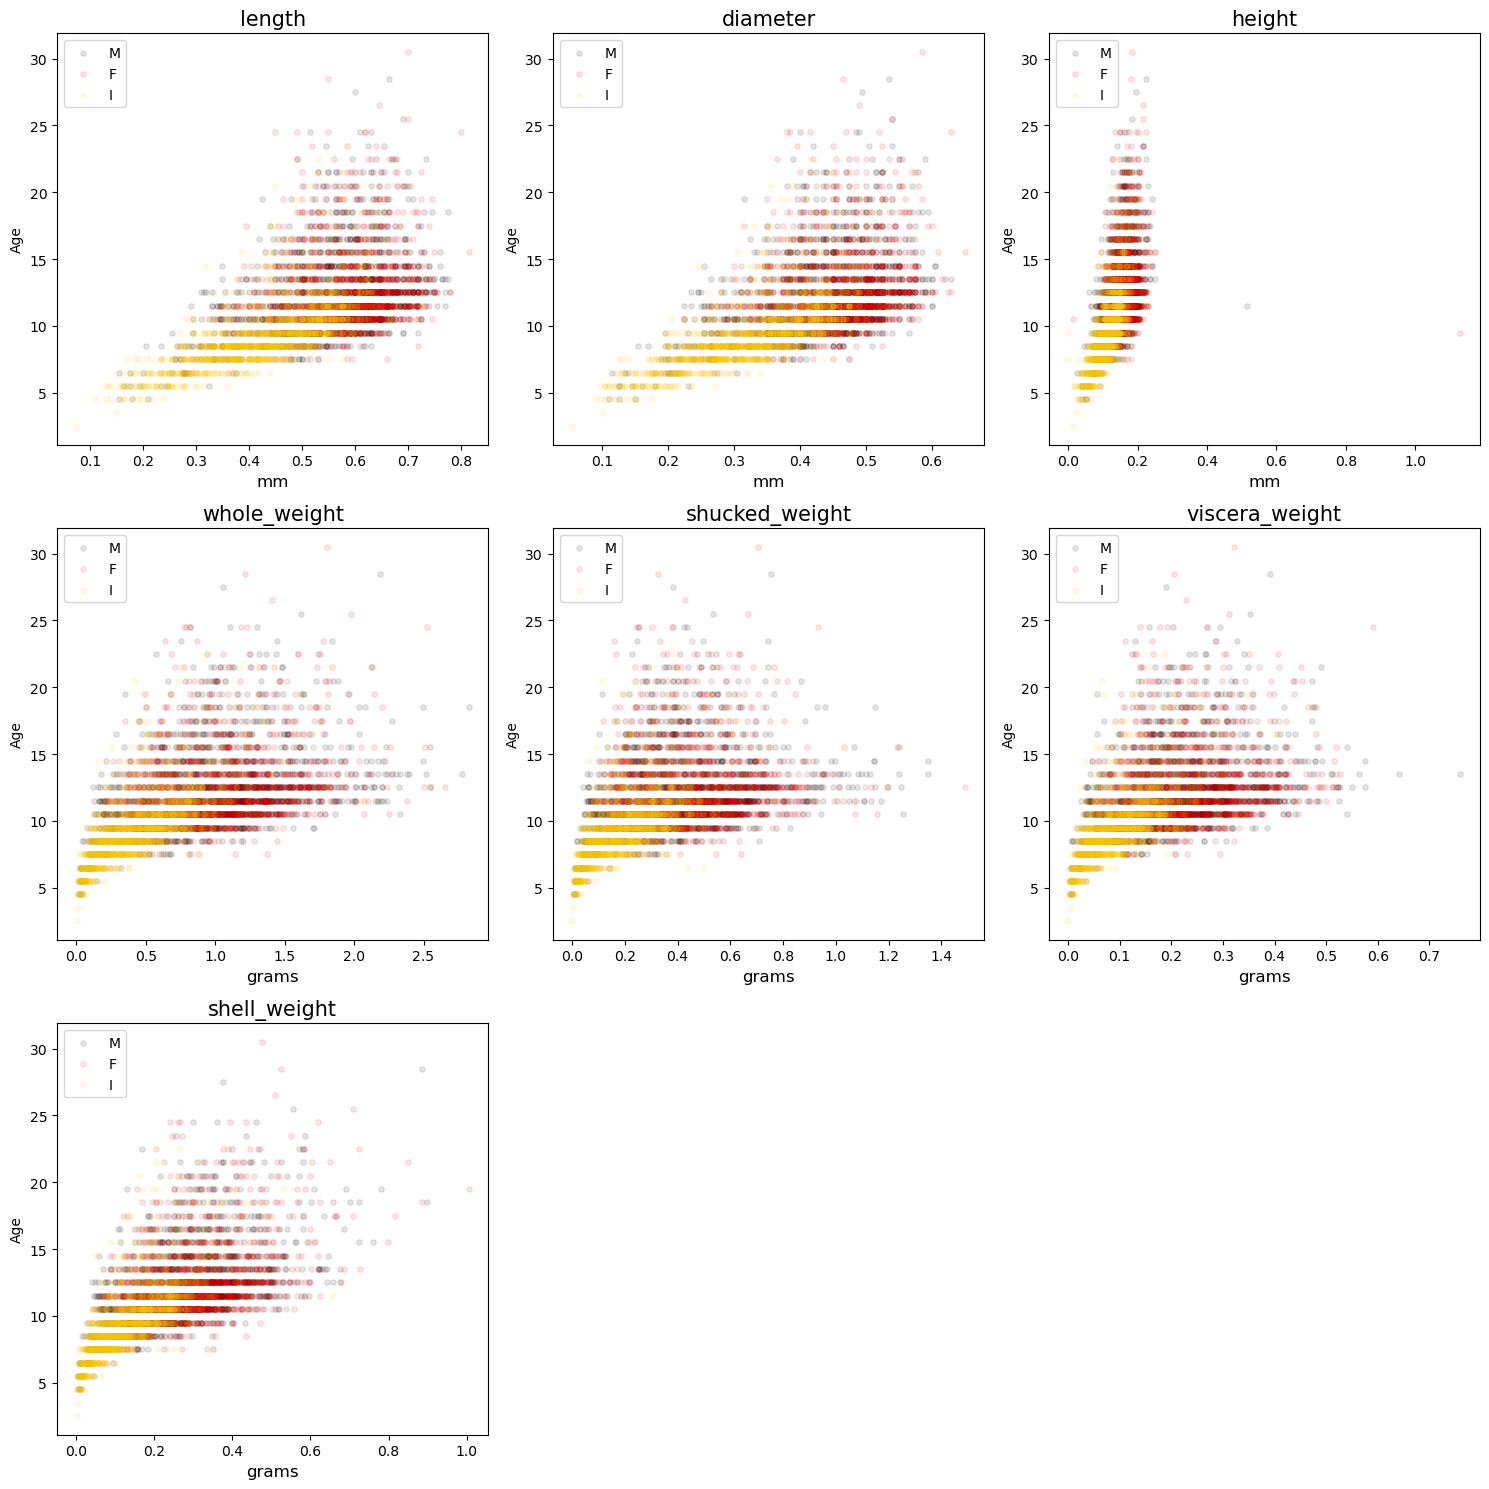

In [222]:
plotSexColour(abaloneData)